In [21]:
from Bio import SeqIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cols = ["strain", "gisaid_epi_isl", "date"]
data = pd.read_csv("../data/raw/gisaid/metadata_clean.csv", usecols=cols)
data

,strain,gisaid_epi_isl,date
0,hCoV-19/Wuhan/IVDC-HB-01/2019,EPI_ISL_402119,2019-12-30
1,hCoV-19/Wuhan/IVDC-HB-04/2020,EPI_ISL_402120,2020-01-01
2,hCoV-19/Wuhan/IVDC-HB-05/2019,EPI_ISL_402121,2019-12-30
3,hCoV-19/Wuhan/IPBCAMS-WH-01/2019,EPI_ISL_402123,2019-12-24
4,hCoV-19/Wuhan/WIV04/2019,EPI_ISL_402124,2019-12-30
...,...,...,...
4297081,hCoV-19/Chile/RM-PUC_MVL_1609/2021,EPI_ISL_5144807,2021-09-23
4297082,hCoV-19/Chile/RM-PUC_MVL_1592/2021,EPI_ISL_5144808,2021-09-04
4297083,hCoV-19/Chile/RM-PUC_MVL_1589/2021,EPI_ISL_5144809,2021-07-14
4297084,hCoV-19/Chile/RM-PUC_MVL_1599/2021,EPI_ISL_5144810,2021-09-20


In [9]:
dates = pd.to_datetime(data.date)
dates

0         2019-12-30
1         2020-01-01
2         2019-12-30
3         2019-12-24
4         2019-12-30
             ...    
4297081   2021-09-23
4297082   2021-09-04
4297083   2021-07-14
4297084   2021-09-20
4297085   2021-09-20
Name: date, Length: 4297086, dtype: datetime64[ns]

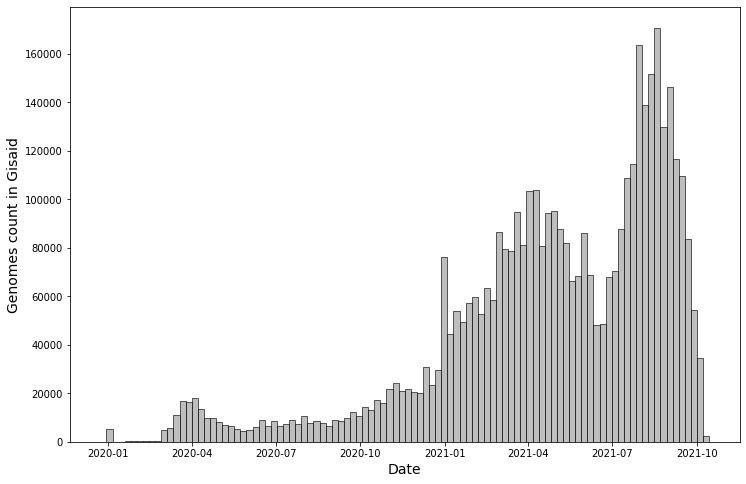

In [28]:
plt.figure(figsize=(12, 8))
sns.histplot(data=dates, bins=100, color='darkgray')
plt.xlabel('Date', fontdict={'fontsize': 14})
plt.ylabel('Genomes count in Gisaid', fontdict={'fontsize': 14})
plt.savefig('../figures/genomes_count_gisaid.pdf')
plt.show()

In [57]:
reader = SeqIO.parse("../data/mulal.fasta", "fasta")

idx = set()
for rec in reader:
    idx.add(rec.name)

In [59]:
len(idx)

1139388

In [66]:
def filter_data(data: pd.DataFrame):
    data = data.copy()
    data = data[data.date.str.contains("\d{4}(-\d\d){1,2}")].sort_values("date")
    data = data[data.strain.isin(idx)]
    data["month"] = sdata.date.str.slice(0, 7)
    return data

In [67]:
fdata = filter_data(data)

/tmp/ipykernel_7554/3166216679.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  data = data[data.date.str.contains("\d{4}(-\d\d){1,2}")].sort_values("date")


In [68]:
fdata

,strain,gisaid_epi_isl,date,month
3,hCoV-19/Wuhan/IPBCAMS-WH-01/2019,EPI_ISL_402123,2019-12-24,2019-12
59,hCoV-19/Wuhan/WH01/2019,EPI_ISL_406798,2019-12-26,2019-12
162,hCoV-19/Wuhan/HBCDC-HB-04/2019,EPI_ISL_412900,2019-12-30,2019-12
94526,hCoV-19/Wuhan/IME-WH05/2019,EPI_ISL_529217,2019-12-30,2019-12
94525,hCoV-19/Wuhan/IME-WH04/2019,EPI_ISL_529216,2019-12-30,2019-12
...,...,...,...,...
4293507,hCoV-19/Denmark/DCGC-181389/2021,EPI_ISL_5137834,2021-10-09,2021-10
4294991,hCoV-19/Denmark/DCGC-181972/2021,EPI_ISL_5141279,2021-10-09,2021-10
4206997,hCoV-19/Italy/SIC-CQRC-2392815/2021,EPI_ISL_5034242,2021-10-09,2021-10
4294733,hCoV-19/Denmark/DCGC-181860/2021,EPI_ISL_5140699,2021-10-09,2021-10


In [72]:
months = fdata.month.unique()

In [74]:
len(months)

23

In [73]:
fdata.month.value_counts().sort_index()

2019-12        22
2020-01       373
2020-02       811
2020-03     15388
2020-04     15354
2020-05      8660
2020-06      9711
2020-07     13836
2020-08     12492
2020-09     13795
2020-10     21208
2020-11     30200
2020-12     41649
2021-01     73883
2021-02     81305
2021-03    118164
2021-04    129274
2021-05    106315
2021-06     78558
2021-07    120123
2021-08    173693
2021-09    107823
2021-10      8203
Name: month, dtype: int64

In [75]:
def split_by_date(df: pd.DataFrame, size=10000) -> list:
    date_intervals = [
        months[:4],     # head
        months[10:11],  # intermediate
        months[-2:],    # tail
    ]
    splits = [
        df[df.month.isin(x)].sample(size) for x in date_intervals
    ]
    
    return splits

In [76]:
s1, s2, s3 = split_by_date(sdata)

In [78]:
s2

,strain,gisaid_epi_isl,date,month
203007,hCoV-19/Wales/PHWC-486F01/2020,EPI_ISL_639147,2020-10-14,2020-10
308976,hCoV-19/Germany/BE-ChVir-D2029-8271/2020,EPI_ISL_753793,2020-10-15,2020-10
1510540,hCoV-19/India/RJ-4757/2020,EPI_ISL_2106847,2020-10-08,2020-10
761376,hCoV-19/Ghana/WACCBIP-GS357/2020,EPI_ISL_1255234,2020-10-26,2020-10
207041,hCoV-19/England/CAMC-B07B58/2020,EPI_ISL_643355,2020-10-29,2020-10
...,...,...,...,...
455480,hCoV-19/Sweden/21-00344/2020,EPI_ISL_913477,2020-10-05,2020-10
3243461,hCoV-19/USA/WY-WYPHL-20098168/2020,EPI_ISL_3905520,2020-10-14,2020-10
189450,hCoV-19/Wales/CAMC-A82D05/2020,EPI_ISL_625288,2020-10-13,2020-10
1510507,hCoV-19/India/RJ-4710/2020,EPI_ISL_2106814,2020-10-02,2020-10


In [9]:
for i in range(3):
    splitted = pd.read_csv(f"../data/splits/metadata_{i + 1}.csv")
    print(i + 1, "-----", splitted.month.unique())

1 ----- ['2020-03' '2020-01' '2020-02' '2019-12']
2 ----- ['2020-10']
3 ----- ['2021-09' '2021-10']
